# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Convolution in code
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [21]:
# import libraries
import numpy as np

# convolution
from scipy.signal import convolve2d

# to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_20128/1386870043.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Manual 2D convolution in numpy/scipy

Text(0.5, 1.0, 'Convolution kernel')

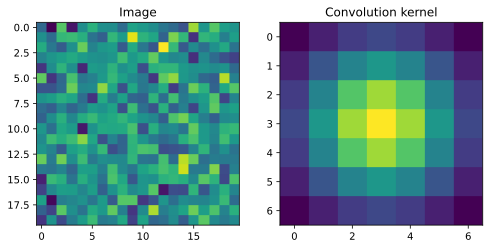

In [22]:
# Image
img_N = 20
image = np.random.randn(img_N, img_N)

# Convolution kernel
kernel_N = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernel_N), np.linspace(-3, 3, kernel_N))
kernel   = np.exp(-(X ** 2 + Y ** 2) / 7)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

In [23]:
# Convolution
conv_output = np.zeros((img_N, img_N))
half_kr     = kernel_N // 2

for row_i in range(half_kr, img_N - half_kr):
    for col_i in range(half_kr, img_N - half_kr):

        # Cut out a piece of the image
        piece_of_img = image       [row_i - half_kr:row_i + half_kr + 1, :] # Get the rows
        piece_of_img = piece_of_img[:, col_i - half_kr:col_i + half_kr + 1] # Extract the columns

        # Dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
        # `[::-1, ::-1]`: Flipping the rows and columns
        dot_prod = np.sum(piece_of_img * kernel[::-1, ::-1])

        # Store the result for this pixel
        conv_output[row_i, col_i] = dot_prod

In [24]:
# Using scipy
conv_output_2 = convolve2d(image, kernel, mode='valid')

Text(0.5, 1.0, 'Scipy Convolution')

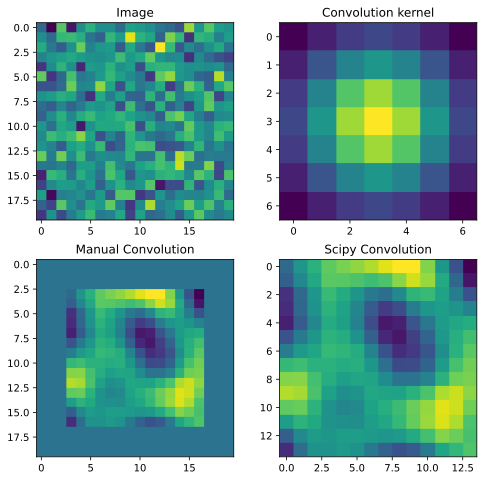

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].imshow(image)
ax[0, 0].set_title('Image')

ax[0, 1].imshow(kernel)
ax[0, 1].set_title('Convolution kernel')

ax[1, 0].imshow(conv_output)
ax[1, 0].set_title('Manual Convolution')

ax[1, 1].imshow(conv_output_2)
ax[1, 1].set_title('Scipy Convolution')

# Examples of convolution with different kernels in a real image

(1675, 3000, 3)
(1675, 3000)


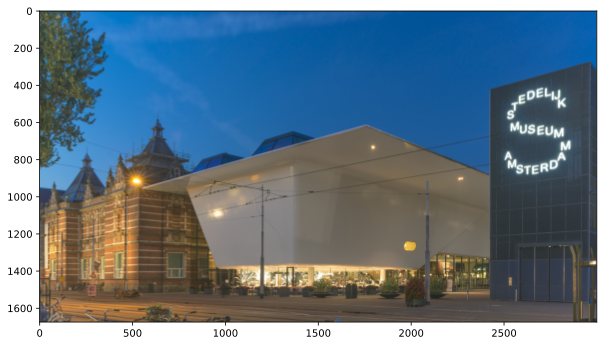

In [33]:
# Read a pic from the web
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# Check the size
print(bathtub.shape)

# Let's see what the famous bathtub museum looks like
fig = plt.figure(figsize=(10, 6))
plt.imshow(bathtub)

# Transform image to 2d for convenience (not necessary for convolution!)
bathtub = np.mean(bathtub, axis=2)
bathtub = bathtub / np.max(bathtub)

# Check the size again
print(bathtub.shape)

In [27]:
# hand-craft two convolution kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

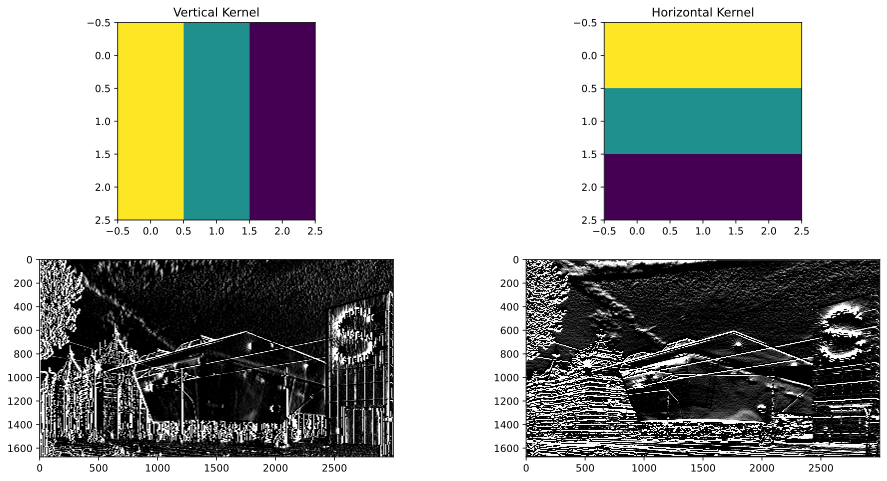

In [35]:
# Hand-craft two convolution kernels
# Vertical kernel
VK = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])

# Horizontal kernel
HK = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical Kernel')
ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal Kernel')

# Run convolution and show the result
conv_res = convolve2d(bathtub, VK, mode='same')
ax[1, 0].imshow(conv_res, cmap='gray', vmin=0, vmax=0.01)

conv_res = convolve2d(bathtub, HK, mode='same')
ax[1, 1].imshow(conv_res, cmap='gray', vmin=0, vmax=0.01)

plt.show()

# Now in PyTorch

In [36]:
# Translate everything into a tensor
import torch
import torch.nn.functional as F

# PTorch expect 4D Tensor
# Num Imgs - Num channels - Height - Width
VK_T      = torch.tensor(VK)     .view(1, 1, 3, 3).double()
HK_T      = torch.tensor(HK)     .view(1, 1, 3, 3).double()
bathtub_T = torch.tensor(bathtub).view(1, 1, bathtub.shape[0], bathtub.shape[1])

print(VK_T.shape)
print(bathtub_T.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [37]:
C = F.conv2d(bathtub_T, VK_T)
print(C.shape)

torch.Size([1, 1, 1673, 2998])


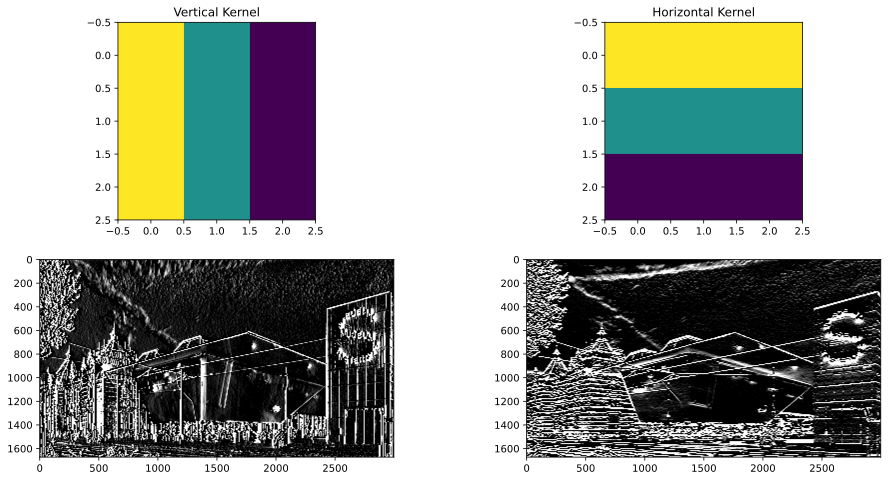

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical Kernel')
ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal Kernel')

# Run convolution and show the result
conv_res = F.conv2d(bathtub_T, VK_T)
# Compress the image to 2D Tensor
# `.detach()`: Uncouple the individual numerical values
img      = torch.squeeze(conv_res.detach())
ax[1, 0].imshow(img, cmap='gray', vmin=0, vmax=0.01)

conv_res = F.conv2d(bathtub_T, HK_T)
img      = torch.squeeze(conv_res.detach())
img      = torch.squeeze(conv_res.detach())

ax[1, 1].imshow(img, cmap='gray', vmin=0, vmax=0.01)

# Additional explorations

In [32]:
# 1) Try creating your own convolution kernels! It's fun and easy ;)
#    Note that image kernels are often crafted to sum to zero, which prevents
#    a global shift in the result. But you don't need to follow that convention.
# 